# 0. Setup

## Módulos comuns

In [40]:
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *
from matplotlib.collections import PatchCollection

## Parâmetros do problema

In [41]:
SCREEN_HEIGHT = 30 # The height of the screen that contains the overlapping windows in pixels
SCREEN_WIDTH = 30 # The width of the screen that contains the overlapping windows in pixels
CLUSTER_DISTANCE_FROM_SCREEN_CENTER = 7 # The distance from the clusters to the screen center in pixels
POINT_DISTANCE_FROM_CLUSTER = 6 #

## Preprocessamento dos parâmetros

In [42]:
SCREEN_CENTER = array([ floor(SCREEN_WIDTH/2), floor(SCREEN_HEIGHT/2) ])

# 1. PREPARAÇÃO DOS DADOS

Os vetores $P_j$ gerados possuem dimensão $4$: a posição $x$ e $y$ (coluna) da origem do retângulo (ponto superior esquerdo), a altura do retângulo $h$ e a largura $w$, de forma que $P_j=(x_j,y_j,h_j,w_j)$. A nivel de implementação, o ponto ainda possui a informação do cluster ao qual ele pertence.

## 1.1 Gerar Centros

In [43]:
n_groups = random.randint(3,7)
angle_between_points = (2.0 * pi / n_groups * arange(0 , n_groups)) # The array of the angle of each cluster w.r.t. the x-axis

clusters = transpose( # Each row is a pair x,y from each cluster
    array( [
        CLUSTER_DISTANCE_FROM_SCREEN_CENTER * cos( angle_between_points ) + SCREEN_CENTER[0],
        CLUSTER_DISTANCE_FROM_SCREEN_CENTER * sin( angle_between_points ) + SCREEN_CENTER[1]
    ] )
)

## 1.2 Gerar pontos ao redor dos centros

In [44]:
size_groups = random.randint(5, 16, n_groups)
points = zeros((sum(size_groups),5)) #

j = 0
for cluster_idx in range(n_groups):
    for idx in range(size_groups[cluster_idx]):
        # Point position
        points[j,:2] = clusters[cluster_idx] + random.randint(-POINT_DISTANCE_FROM_CLUSTER/2,POINT_DISTANCE_FROM_CLUSTER/2, 2)
        # Point dimension
        points[j,2:4] = random.randint(2,4,2)
        # cluster_information
        points[j,4] = cluster_idx
        j += 1

## 1.3 Mostrar os dados

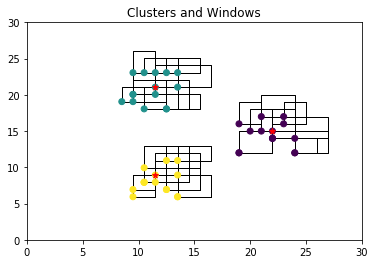

In [48]:
fig, ax = subplots(1)
ax.set_title("Clusters and Windows")
ax.set_xlim(0, SCREEN_WIDTH)
ax.set_ylim(0, SCREEN_HEIGHT)


# Draw Rectangles
rect_list = []
for j in range(sum(size_groups)):
    point = points[j]
    rect = Rectangle((point[0], point[1]), point[2], point[3])
    rect_list.append(rect)
pc = PatchCollection(rect_list, facecolor="None", edgecolor="k")
ax.add_collection(pc)

scatter(points[:,0], points[:,1], c=points[:,4])
    
# Plot Clusters
ax.scatter(clusters[:,0], clusters[:,1], c="red", marker="*")

# Display
show()


# 2. Modelagem Matemática


O problema se resume a maximizar $E(X) = (1-\alpha) E_O(X) + \alpha E_N(X) $, em que $X=(x_j, y_j)$ e $\alpha \in [0,1]$. $E_0$ e $E_N$ são as funções de energia de overlap e a de relação entre os vizinhos. Mais detalhes sobre as funções podem ser encontradas (neste link)[https://ieeexplore.ieee.org/abstract/document/6629989].

In [46]:
def E_O(X):
    
    

SyntaxError: unexpected EOF while parsing (<ipython-input-46-3f02b36be804>, line 3)

# 3. Solução Numérica

# 4. Visualização dos Resultados

# 5. Elaboração de relatório